In [87]:
from nltk.corpus import movie_reviews

In [88]:
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')

In [89]:
negfeats = [" ".join(movie_reviews.words(fileids=[f])) for f in negids]

In [90]:
negfeats[2:3]

[u"it is movies like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch . based on the late 1960 ' s television show by the same name , the mod squad tells the tale of three reformed criminals under the employ of the police to go undercover . however , things go wrong as evidence gets stolen and they are immediately under suspicion . of course , the ads make it seem like so much more . quick cuts , cool music , claire dane ' s nice hair and cute outfits , car chases , stuff blowing up , and the like . sounds like a cool movie , does it not ? after the first fifteen minutes , it quickly becomes apparent that it is not . the mod squad is certainly a slick looking production , complete with nice hair and costumes , but that simply isn ' t enough . the film is best described as a cross between an hour - long cop show and a music video , both stretched out into the span of an hour and a half . and with it comes every single clich ? . it doesn ' t real

In [91]:
posfeats = [" ".join(movie_reviews.words(fileids=[f])) for f in posids]

In [92]:
posfeats[2]

u"you ' ve got mail works alot better than it deserves to . in order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . no real acting was involved and there is not an original or inventive bone in it ' s body ( it ' s basically a complete re - shoot of the shop around the corner , only adding a few modern twists ) . essentially , it goes against and defies all concepts of good contemporary filmmaking . it ' s overly sentimental and at times terribly mushy , not to mention very manipulative . but oh , how enjoyable that manipulation is . but there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan / hanks teaming , sleepless in seattle . it couldn ' t have been the directing , because both films were helmed by the same woman . i haven ' t quite yet figured out w

In [7]:
list_of_review = negfeats + posfeats
y_target = [0 for _ in range(len(negfeats))] + [1 for _ in range(len(posfeats))]

In [8]:
len(list_of_review)

2000

In [9]:
with open("answer_1.txt", "w") as fp:
    fp.write("2000")

In [10]:
len(posfeats)

1000

In [11]:
with open("answer_2.txt", "w") as fp:
    fp.write("0.5")

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
trn = CountVectorizer()
X = trn.fit_transform(list_of_review)

In [14]:
X.shape

(2000, 39659)

In [15]:
with open("answer_1_3.txt", "w") as fp:
    fp.write("39659")

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [17]:
pipe = Pipeline([('vectorizer', CountVectorizer()),('classifier', LogisticRegression())])

In [18]:
from sklearn.cross_validation import cross_val_score

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
sscores = cross_val_score(pipe, list_of_review, y_target, scoring='accuracy')

In [20]:
sscores.mean()

0.83602165039290777

In [21]:
with open("answer_3.txt", "w") as fp:
    fp.write(str(sscores.mean()))

In [22]:
sscores = cross_val_score(pipe, list_of_review, y_target, scoring='roc_auc')

In [23]:
sscores.mean()

0.91077649378337744

In [24]:
with open("answer_4.txt", "w") as fp:
    fp.write(str(sscores.mean()))

In [25]:
pipe.fit(list_of_review, y_target)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
    ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [26]:
import numpy as np

In [27]:
list_of_coef = np.array(pipe.named_steps['classifier'].coef_)

In [28]:
l_o_c = abs(list_of_coef)

In [29]:
l_o_c[:, 2954]

array([ 0.78225384])

In [30]:
most_valuable = l_o_c.argsort()[:,-1:-6:-1][0]

In [31]:
vec = pipe.named_steps['vectorizer']

In [32]:
feat_names = vec.get_feature_names()

In [33]:
for feat in most_valuable:
    print feat_names[feat]

bad
unfortunately
worst
fun
waste


In [34]:
with open("answer_6.txt", "w") as fp:
    for feat in most_valuable:
        fp.write(feat_names[feat])
        fp.write(" ")

In [35]:
sscores = cross_val_score(pipe, list_of_review, y_target, cv=5)

In [36]:
sscores.mean(), sscores.std()

(0.84099999999999997, 0.016777961735562549)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
pipe2 = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', LogisticRegression())])

In [39]:
sscores2 = cross_val_score(pipe2, list_of_review, y_target, cv=5)

In [40]:
sscores2.mean(), sscores2.std()

(0.82100000000000006, 0.0040620192023179784)

In [41]:
answer_2_1 = map(str, [sscores.mean(), sscores.std(), sscores2.mean(), sscores2.std()])
answer_2_1

['0.841', '0.0167779617356', '0.821', '0.00406201920232']

In [42]:
with open("answer_2_1.txt", "w") as fp:
        fp.write(" ".join(answer_2_1))

In [43]:
pipe_3 = Pipeline([('vectorizer', CountVectorizer(min_df=10)), ('classifier', LogisticRegression())])

In [44]:
sscores3 = cross_val_score(pipe_3, list_of_review, y_target, cv=5)
sscores3.mean()

0.83900000000000008

In [45]:
pipe_4 = Pipeline([('vectorizer', CountVectorizer(min_df=50)), ('classifier', LogisticRegression())])

In [46]:
sscores4 = cross_val_score(pipe_4, list_of_review, y_target, cv=5)
sscores4.mean()

0.81299999999999994

In [47]:
with open("answer_2_2.txt", "w") as fp:
        fp.write(" ".join(map(str, [sscores3.mean(), sscores4.mean()])))

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

In [49]:
cls_list = [LogisticRegression(), LinearSVC(), SGDClassifier()]
for cls in cls_list:
    pipe = Pipeline([('vectorizer', CountVectorizer()),('classifier', cls)])
    scores = cross_val_score(pipe, list_of_review, y_target, cv=5)
    print scores.mean()

0.841
0.8325
0.6815


In [50]:
with open("answer_2_3.txt", "w") as fp:
        fp.write(str(scores.mean()))

In [51]:
import nltk

In [52]:
stop_words = nltk.corpus.stopwords.words('english')

In [53]:
stop_words[:9]

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you']

In [54]:
pipe = Pipeline([('vectorizer', CountVectorizer(stop_words=stop_words)),('classifier', LogisticRegression())])
scores1 = cross_val_score(pipe, list_of_review, y_target, cv=5)
scores1.mean()

0.84149999999999991

In [55]:
pipe = Pipeline([('vectorizer', CountVectorizer(stop_words='english')),('classifier', LogisticRegression())])
scores2 = cross_val_score(pipe, list_of_review, y_target, cv=5)
scores2.mean()

0.83850000000000002

In [56]:
with open("answer_2_4.txt", "w") as fp:
        fp.write(" ".join(map(str,[scores1.mean(), scores2.mean()])))

In [57]:
pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),('classifier', LogisticRegression())])
scores1 = cross_val_score(pipe, list_of_review, y_target, cv=5)
scores1.mean()

0.85250000000000004

In [58]:
pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(3,5), analyzer='char_wb')),('classifier', LogisticRegression())])
scores2 = cross_val_score(pipe, list_of_review, y_target, cv=5)
scores2.mean()

0.81999999999999995

In [59]:
with open("answer_2_5.txt", "w") as fp:
        fp.write(" ".join(map(str,[scores1.mean(), scores2.mean()])))

In [60]:
import pickle

In [111]:
pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),('classifier', LogisticRegression())])

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

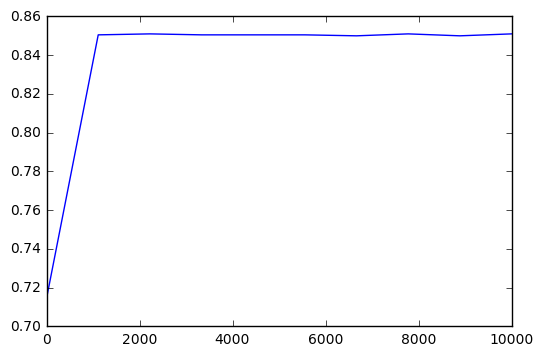

In [95]:
res_list = []
for C in np.linspace(1e-4,1e4,10):
    pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),('classifier', LogisticRegression(C=C))])
    scores = cross_val_score(pipe, list_of_review, y_target, cv=5)
    res_list.append(scores.mean())

plt.plot(np.linspace(1e-4,1e4,10), res_list)
plt.show()

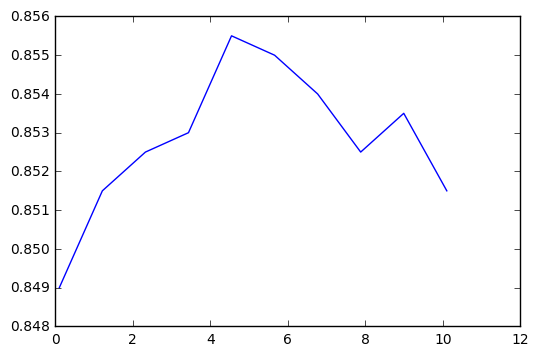

In [96]:
res_list = []
for C in np.linspace(0.1,10.1,10):
    pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),('classifier', LogisticRegression(C=C))])
    scores = cross_val_score(pipe, list_of_review, y_target, cv=5)
    res_list.append(scores.mean())

plt.plot(np.linspace(0.1,10.1,10), res_list)
plt.show()

In [97]:
print np.linspace(0.1,10.1,10)[np.array(res_list).argmax()], np.array(res_list).max()

4.54444444444 0.8555


In [126]:
C = 4.54444444444
pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),('classifier', LogisticRegression(C=C))])

In [127]:
pipe.fit(list_of_review, y_target)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
    ...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [102]:
pipe.predict_proba(["very good film"])

array([[ 0.46921818,  0.53078182]])

In [82]:
from sklearn.externals import joblib

In [128]:
joblib.dump(pipe, "pipe.pkl")

['pipe.pkl']

In [123]:
p = joblib.load("pipe.pkl")

In [124]:
p.predict_proba(["good movie"])

array([[ 0.55480714,  0.44519286]])

In [125]:
p.predict(["good movie"])

array([0])

In [69]:
vect = CountVectorizer(ngram_range=(1,2))
vect_rev = vect.fit_transform(list_of_review)

In [70]:
cls = LogisticRegression()
cls.fit(vect_rev, y_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
test_vect = vect.transform(["very good film"])

In [86]:
joblib.dump(vect, "CountVect.pkl")
joblib.dump(cls, "Classifier.pkl")

['Classifier.pkl']